## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0   6.663633   788.989324  0.533740  7.048958  421.101131
1  60.276743   387.241283  0.327141  6.316662  140.261938
2  97.517277  1676.363892  0.198889  2.024783  347.322148
3  74.288037  1029.007134  0.513542  6.243270  533.706603
4  22.921811  1247.106719  0.348588  3.581931  435.337851


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9927363	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9809205	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9721348	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9612155	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9475255	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9352171	total: 60ms	remaining: 9.94s
6:	learn: 0.9220147	total: 60.5ms	remaining: 8.58s
7:	learn: 0.9103769	total: 61ms	remaining: 7.56s
8:	learn: 0.9004470	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8889802	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8788917	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8665744	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8557150	total: 63.4ms	remaining: 4.82s
13:	learn: 0.8430936	total: 64.1ms	remaining: 4.51s
14:	learn: 0.8320717	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8226224	total: 65.1ms	remaining: 4s
16:	learn: 0.8126604	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8032517	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7957114	total: 66.2ms	remaining: 3.42s


111:	learn: 0.2861012	total: 108ms	remaining: 855ms
112:	learn: 0.2838286	total: 108ms	remaining: 851ms
113:	learn: 0.2812396	total: 109ms	remaining: 845ms
114:	learn: 0.2784308	total: 109ms	remaining: 840ms
115:	learn: 0.2755507	total: 110ms	remaining: 835ms
116:	learn: 0.2733214	total: 110ms	remaining: 830ms
117:	learn: 0.2708174	total: 110ms	remaining: 825ms
118:	learn: 0.2684691	total: 111ms	remaining: 820ms
119:	learn: 0.2652683	total: 111ms	remaining: 815ms
120:	learn: 0.2628859	total: 112ms	remaining: 811ms
121:	learn: 0.2604352	total: 112ms	remaining: 806ms
122:	learn: 0.2578273	total: 112ms	remaining: 801ms
123:	learn: 0.2551878	total: 113ms	remaining: 796ms
124:	learn: 0.2527568	total: 113ms	remaining: 791ms
125:	learn: 0.2499101	total: 114ms	remaining: 787ms
126:	learn: 0.2473088	total: 114ms	remaining: 782ms
127:	learn: 0.2448627	total: 114ms	remaining: 778ms
128:	learn: 0.2426674	total: 115ms	remaining: 774ms
129:	learn: 0.2399232	total: 115ms	remaining: 769ms
130:	learn: 

291:	learn: 0.0811445	total: 185ms	remaining: 450ms
292:	learn: 0.0808907	total: 186ms	remaining: 449ms
293:	learn: 0.0804384	total: 186ms	remaining: 448ms
294:	learn: 0.0799504	total: 187ms	remaining: 447ms
295:	learn: 0.0797107	total: 187ms	remaining: 446ms
296:	learn: 0.0792553	total: 188ms	remaining: 444ms
297:	learn: 0.0790353	total: 188ms	remaining: 444ms
298:	learn: 0.0786091	total: 189ms	remaining: 442ms
299:	learn: 0.0781690	total: 189ms	remaining: 441ms
300:	learn: 0.0779516	total: 190ms	remaining: 440ms
301:	learn: 0.0775994	total: 190ms	remaining: 439ms
302:	learn: 0.0773857	total: 191ms	remaining: 438ms
303:	learn: 0.0769704	total: 191ms	remaining: 437ms
304:	learn: 0.0765985	total: 191ms	remaining: 436ms
305:	learn: 0.0762156	total: 192ms	remaining: 435ms
306:	learn: 0.0759976	total: 192ms	remaining: 434ms
307:	learn: 0.0754288	total: 192ms	remaining: 432ms
308:	learn: 0.0752158	total: 193ms	remaining: 431ms
309:	learn: 0.0750032	total: 193ms	remaining: 430ms
310:	learn: 

524:	learn: 0.0290740	total: 289ms	remaining: 262ms
525:	learn: 0.0289171	total: 290ms	remaining: 261ms
526:	learn: 0.0287606	total: 290ms	remaining: 260ms
527:	learn: 0.0286711	total: 290ms	remaining: 260ms
528:	learn: 0.0285270	total: 291ms	remaining: 259ms
529:	learn: 0.0283774	total: 291ms	remaining: 258ms
530:	learn: 0.0282162	total: 292ms	remaining: 258ms
531:	learn: 0.0281300	total: 292ms	remaining: 257ms
532:	learn: 0.0279909	total: 293ms	remaining: 256ms
533:	learn: 0.0278561	total: 293ms	remaining: 256ms
534:	learn: 0.0277082	total: 293ms	remaining: 255ms
535:	learn: 0.0275764	total: 294ms	remaining: 254ms
536:	learn: 0.0274987	total: 294ms	remaining: 254ms
537:	learn: 0.0273538	total: 294ms	remaining: 253ms
538:	learn: 0.0272039	total: 295ms	remaining: 252ms
539:	learn: 0.0270628	total: 295ms	remaining: 252ms
540:	learn: 0.0269171	total: 296ms	remaining: 251ms
541:	learn: 0.0267795	total: 296ms	remaining: 250ms
542:	learn: 0.0266301	total: 297ms	remaining: 250ms
543:	learn: 

714:	learn: 0.0156274	total: 367ms	remaining: 146ms
715:	learn: 0.0155797	total: 367ms	remaining: 146ms
716:	learn: 0.0155267	total: 368ms	remaining: 145ms
717:	learn: 0.0154896	total: 368ms	remaining: 145ms
718:	learn: 0.0154424	total: 368ms	remaining: 144ms
719:	learn: 0.0153857	total: 369ms	remaining: 143ms
720:	learn: 0.0153396	total: 369ms	remaining: 143ms
721:	learn: 0.0152844	total: 370ms	remaining: 142ms
722:	learn: 0.0152051	total: 370ms	remaining: 142ms
723:	learn: 0.0151602	total: 370ms	remaining: 141ms
724:	learn: 0.0150824	total: 371ms	remaining: 141ms
725:	learn: 0.0150619	total: 371ms	remaining: 140ms
726:	learn: 0.0150083	total: 372ms	remaining: 140ms
727:	learn: 0.0149322	total: 372ms	remaining: 139ms
728:	learn: 0.0148976	total: 373ms	remaining: 139ms
729:	learn: 0.0148540	total: 373ms	remaining: 138ms
730:	learn: 0.0148017	total: 374ms	remaining: 138ms
731:	learn: 0.0147273	total: 374ms	remaining: 137ms
732:	learn: 0.0146542	total: 375ms	remaining: 136ms
733:	learn: 

950:	learn: 0.0087867	total: 471ms	remaining: 24.3ms
951:	learn: 0.0087802	total: 472ms	remaining: 23.8ms
952:	learn: 0.0087406	total: 472ms	remaining: 23.3ms
953:	learn: 0.0087342	total: 473ms	remaining: 22.8ms
954:	learn: 0.0087102	total: 473ms	remaining: 22.3ms
955:	learn: 0.0086713	total: 473ms	remaining: 21.8ms
956:	learn: 0.0086479	total: 474ms	remaining: 21.3ms
957:	learn: 0.0086273	total: 474ms	remaining: 20.8ms
958:	learn: 0.0086094	total: 475ms	remaining: 20.3ms
959:	learn: 0.0085893	total: 475ms	remaining: 19.8ms
960:	learn: 0.0085571	total: 475ms	remaining: 19.3ms
961:	learn: 0.0085374	total: 476ms	remaining: 18.8ms
962:	learn: 0.0085112	total: 476ms	remaining: 18.3ms
963:	learn: 0.0084799	total: 477ms	remaining: 17.8ms
964:	learn: 0.0084691	total: 477ms	remaining: 17.3ms
965:	learn: 0.0084522	total: 477ms	remaining: 16.8ms
966:	learn: 0.0084190	total: 478ms	remaining: 16.3ms
967:	learn: 0.0083862	total: 478ms	remaining: 15.8ms
968:	learn: 0.0083540	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

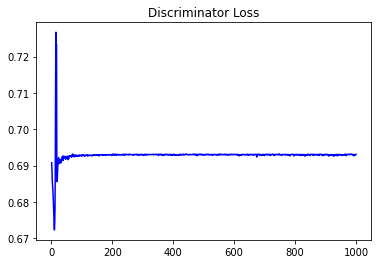

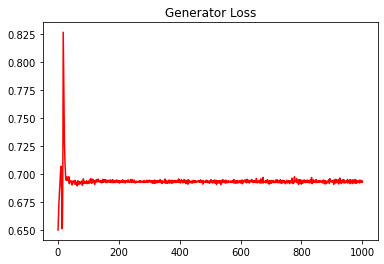

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.00491161219342255


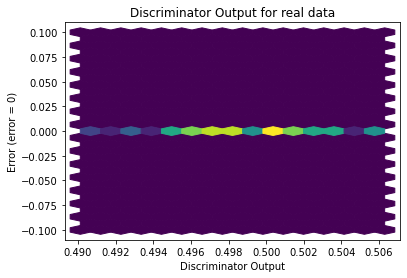

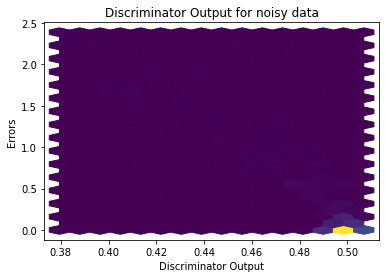

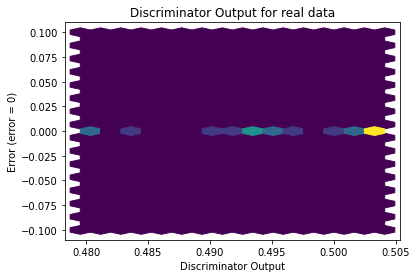

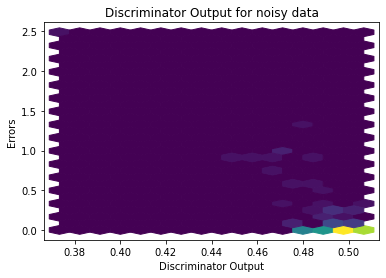

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


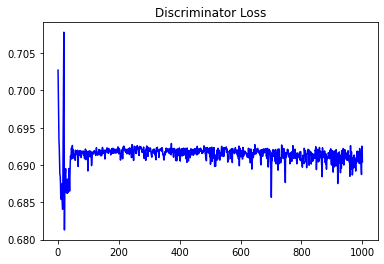

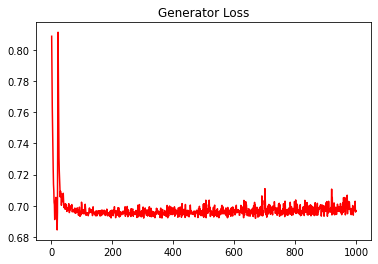

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009465652053858187


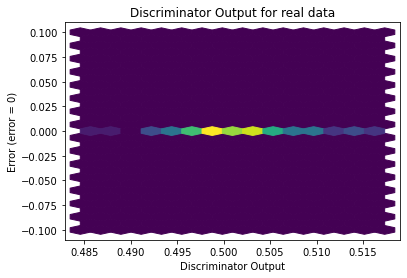

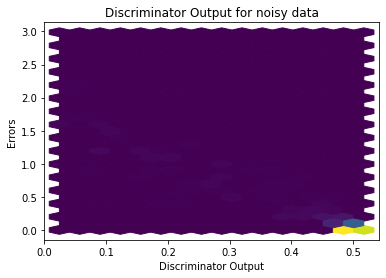

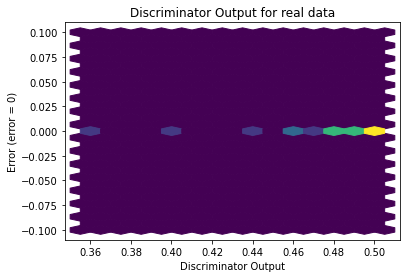

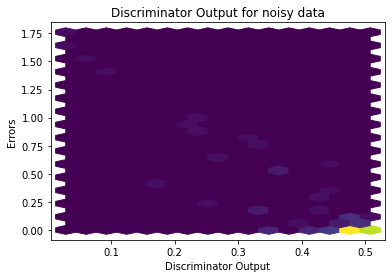

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7005]], requires_grad=True)
